In [1]:
print('ciao')

ciao


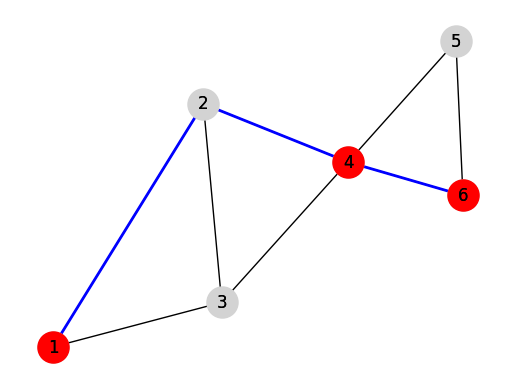

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges with weights
G.add_edge(1, 2, weight=1)
G.add_edge(1, 3, weight=2)
G.add_edge(2, 3, weight=3)
G.add_edge(2, 4, weight=4)
G.add_edge(3, 4, weight=5)
G.add_edge(4, 5, weight=6)
G.add_edge(4, 6, weight=7)
G.add_edge(5, 6, weight=8)

# Specify the terminals (Steiner points)
terminals = [1, 4, 6]

# Specify the Steiner tree edges
steiner_edges = [(1, 2), (2, 4), (4, 6)]

# Create a subgraph for the Steiner tree
steiner_tree = G.edge_subgraph(steiner_edges)

# Set positions for the nodes
pos = nx.spring_layout(G)

# Draw the graph with terminals in red and Steiner tree edges in blue
nx.draw_networkx(G, pos, with_labels=True, node_color='lightgray', node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G, pos, nodelist=terminals, node_color='red', node_size=500)
nx.draw_networkx_edges(steiner_tree, pos, edge_color='blue', width=2)

# Display the graph
plt.axis('off')
plt.show()


In [13]:
class Graph:
    def __init__(self):
        self.vertices = {}

    def add_vertex(self, vertex):
        self.vertices[vertex] = {}

    def add_edge(self, vertex1, vertex2, weight):
        if vertex1 not in self.vertices:
            self.add_vertex(vertex1)
        if vertex2 not in self.vertices:
            self.add_vertex(vertex2)

        self.vertices[vertex1][vertex2] = weight
        self.vertices[vertex2][vertex1] = weight

    def get_neighbors(self, vertex):
        return self.vertices[vertex]
    
    def get_vertices(self):
        return list(self.vertices.keys())
    
    def get_weight(self, vertex1, vertex2):
        if vertex1 in self.vertices and vertex2 in self.vertices[vertex1]:
            return self.vertices[vertex1][vertex2]
        else:
            return None
        

In [3]:
# Example usage:
graph = Graph()
graph.add_edge('A', 'B', 4)
graph.add_edge('A', 'C', 2)
graph.add_edge('B', 'C', 1)
graph.add_edge('B', 'D', 5)
graph.add_edge('C', 'D', 8)
graph.add_edge('C', 'E', 10)
graph.add_edge('D', 'E', 2)

print("Neighbor A:", graph.get_neighbors('A'))
print("Neighbor B:", graph.get_neighbors('B'))

Neighbor A: {'B': 4, 'C': 2}
Neighbor B: {'A': 4, 'C': 1, 'D': 5}


Neighbor A: {'B': 3, 'D': 2, 'E': 6}
Neighbor E: {'A': 6, 'D': 3, 'F': 5, 'G': 1}
Neighbor F: {'E': 5, 'G': 5, 'C': 2, 'B': 7}
Peso tra A e B:  3
Tutti i vertici:  ['A', 'B', 'D', 'E', 'C', 'G', 'F']


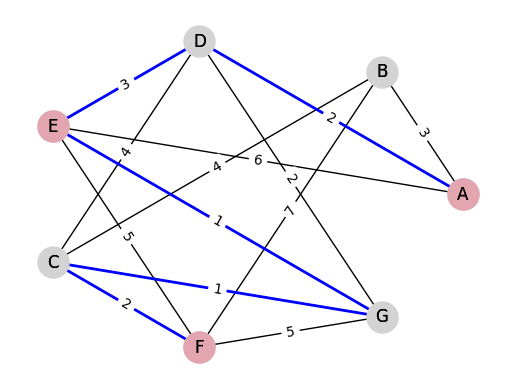

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

graph2 = Graph()
graph2.add_edge('A', 'B', 3)
graph2.add_edge('A', 'D', 2)
graph2.add_edge('A', 'E', 6)
graph2.add_edge('D', 'C', 4)
graph2.add_edge('D', 'E', 3)
graph2.add_edge('D', 'G', 2)
graph2.add_edge('E', 'F', 5)
graph2.add_edge('E', 'G', 1)
graph2.add_edge('G', 'F', 5)
graph2.add_edge('G', 'C', 1)
graph2.add_edge('C', 'F', 2)
graph2.add_edge('B', 'C', 4)
graph2.add_edge('F', 'B', 7)


print("Neighbor A:", graph2.get_neighbors('A'))
print("Neighbor E:", graph2.get_neighbors('E'))
print("Neighbor F:", graph2.get_neighbors('F'))
print("Peso tra A e B: ", graph2.get_weight('A','B'))
print("Tutti i vertici: ",graph2.get_vertices())


nx_graph = nx.Graph()
for vertex, neighbors in graph2.vertices.items():
    for neighbor, weight in neighbors.items():
        nx_graph.add_edge(vertex, neighbor, weight=weight)


#Parte dello steiner Tree        
terminals = ['A', 'E', 'F']

# Specify the Steiner tree edges
steiner_edges = [('A', 'D'), ('D', 'E'), ('E', 'G'),('G','C'),('C','F')]

# Create a subgraph for the Steiner tree
steiner_tree = nx_graph.edge_subgraph(steiner_edges)

# Disegno del grafo
#pos = nx.spring_layout(nx_graph)  # Layout a molla
pos = nx.circular_layout(nx_graph)


# Draw the graph with terminals in red and Steiner tree edges in blue
nx.draw_networkx(nx_graph, pos, with_labels=True, node_color='lightgray', node_size=500)
nx.draw_networkx_labels(nx_graph, pos)
nx.draw_networkx_nodes(nx_graph, pos, nodelist=terminals, node_color='#e3a5b0', node_size=500)
edge_labels = nx.get_edge_attributes(nx_graph, 'weight')
nx.draw_networkx_edges(steiner_tree, pos, edge_color='blue', width=2)
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels = edge_labels, font_size=10)


# Visualizzazione del grafo
plt.axis('off')
plt.show()